In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [19]:

# Directory containing the CSV files
directory = '.'

# Initialize an empty list to store DataFrames
dfs = []

# Iterate over the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv') and 'split' in filename:
        # Extract values from the filename
        values = {}
        values['dataset'] = filename.split('_')[1]
        for field in ['beta', 'start_layer', 'split']:
            field_value = filename.split(field + '=')[1].split('_')[0]
            values[field] = field_value

        # Read the CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        try:
            df = pd.read_csv(filepath)
        except:
            print(f"Error reading file: {filename}")
            continue
        # List of fields to keep in the DataFrame
        fields_to_keep = ["Epoch", "Layer", "Smooth Rank (λ=1.0)", "Train Loss", "Test Loss"]

        # Select only the desired fields in the DataFrame   
        df = df.loc[:, fields_to_keep]

        # Calculate sliding average for specified fields
        sliding_average_window = 50  # Specify the window size for the sliding average

        # Pivot the DataFrame to create separate columns for each "Layer" value in "Smooth Rank (λ=1.0)"
        pivot_df = df.pivot(index=["Epoch",  "Train Loss", "Test Loss"], columns="Layer", values="Smooth Rank (λ=1.0)")

        # Rename the columns with a prefix and remove the "Layer" column
        prefix = "Smooth Rank (λ=1.0) "
        rank_columns = pivot_df.columns = [prefix + str(col) for col in pivot_df.columns]
        pivot_df = pivot_df.reset_index()

        # Merge the pivoted DataFrame with the original DataFrame
        df = pd.merge(df, pivot_df, on=["Epoch", "Train Loss", "Test Loss"])

        # Remove the original "Layer" and "Smooth Rank (λ=1.0)" columns
        df = df.drop(columns=["Layer", "Smooth Rank (λ=1.0)"])

        # Apply sliding average to the fields
        fields_to_average = ["Train Loss", "Test Loss"] + rank_columns
        df[fields_to_average] = df[fields_to_average].rolling(sliding_average_window, min_periods=1).mean()

        # Add columns for dataset, beta, start_layer, and split
        df['dataset'] = values['dataset']
        df['beta'] = float(values['beta'])
        df['start_layer'] = int(values['start_layer'])
        df['split'] = values['split']

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
big_df = pd.concat(dfs, ignore_index=True)

# Print the resulting combined DataFrame
print(big_df)

        Epoch  Train Loss  Test Loss  Smooth Rank (λ=1.0) 0  \
0           0    0.035980   0.039373               6.181394   
1           0    0.035980   0.039373               6.181394   
2           0    0.035980   0.039373               6.181394   
3           0    0.035980   0.039373               6.181394   
4           1    0.034034   0.037669               6.181412   
...       ...         ...        ...                    ...   
427331    998    0.048460   0.042494               6.844671   
427332    999    0.047896   0.041961               6.844670   
427333    999    0.047332   0.041427               6.844670   
427334    999    0.047453   0.041551               6.844654   
427335    999    0.047574   0.041675               6.844639   

        Smooth Rank (λ=1.0) 1  Smooth Rank (λ=1.0) 2  Smooth Rank (λ=1.0) 3  \
0                    2.801721               1.432701               0.933869   
1                    2.801721               1.432701               0.933869   
2     

In [20]:
# Group by 'dataset', 'beta', and 'start_layer' and calculate average and standard deviation
grouped_df = big_df.groupby(["dataset", "beta", "start_layer", "Epoch",]).mean()

# Reset index to make the group columns as regular columns
grouped_df = grouped_df.reset_index()

# Print the resulting grouped DataFrame
print(grouped_df)

      dataset  beta  start_layer  Epoch  Train Loss  Test Loss  \
0        bike  0.00            3      0    0.203745   0.203959   
1        bike  0.00            3      1    0.179856   0.180614   
2        bike  0.00            3      2    0.159082   0.160262   
3        bike  0.00            3      3    0.143089   0.144401   
4        bike  0.00            3      4    0.133606   0.134966   
...       ...   ...          ...    ...         ...        ...   
11995  kin40k  0.01            3    995    0.083173   0.082761   
11996  kin40k  0.01            3    996    0.083238   0.082866   
11997  kin40k  0.01            3    997    0.083130   0.082796   
11998  kin40k  0.01            3    998    0.083117   0.082830   
11999  kin40k  0.01            3    999    0.083079   0.082798   

       Smooth Rank (λ=1.0) 0  Smooth Rank (λ=1.0) 1  Smooth Rank (λ=1.0) 2  \
0                   6.845111               7.349747               3.187996   
1                   6.845128               7.186096

/tmp/ipykernel_30930/3993104248.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = big_df.groupby(["dataset", "beta", "start_layer", "Epoch",]).mean()


In [21]:
res_df = grouped_df[grouped_df['Epoch'] == 199]
print(res_df.to_markdown())

|       | dataset      |   beta |   start_layer |   Epoch |   Train Loss |   Test Loss |   Smooth Rank (λ=1.0) 0 |   Smooth Rank (λ=1.0) 1 |   Smooth Rank (λ=1.0) 2 |   Smooth Rank (λ=1.0) 3 |
|------:|:-------------|-------:|--------------:|--------:|-------------:|------------:|------------------------:|------------------------:|------------------------:|------------------------:|
|   199 | bike         |   0    |             3 |     199 |    0.0525618 |   0.052777  |                 6.84509 |                 4.69537 |               1.03659   |                0.494441 |
|  1199 | bike         |   0.01 |             1 |     199 |    0.0564714 |   0.057371  |                 6.8451  |                 4.10432 |               1.02854   |                0.476472 |
|  2199 | bike         |   0.01 |             2 |     199 |    0.0531055 |   0.0538197 |                 6.84512 |                 4.64265 |               1.01618   |                0.498447 |
|  3199 | bike         |   0.01 |  

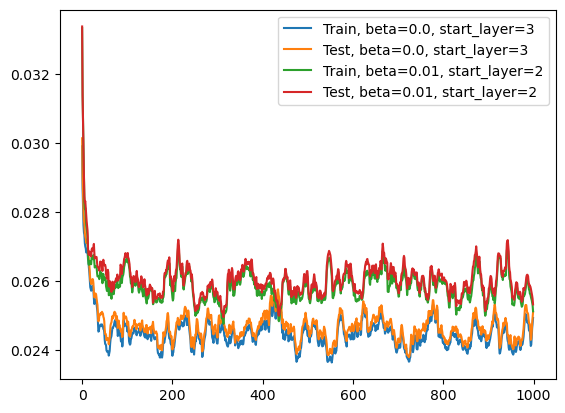

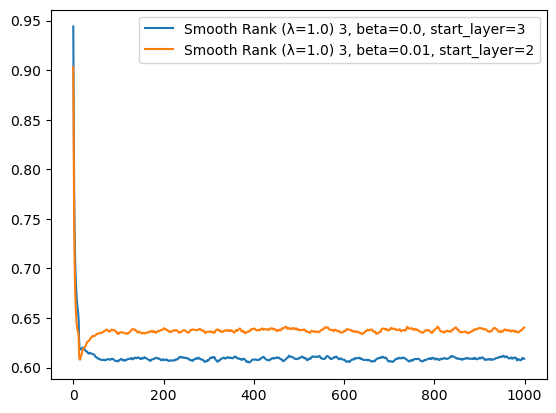

In [26]:
dataset = 'keggdirected'
beta = 0.01
tests = ({'beta': 0.0, 'start_layer': 3}, {'beta': beta, 'start_layer': 1}, {'beta': beta, 'start_layer': 2}, {'beta': beta, 'start_layer': 3})
for test in [tests[0], tests[2]]:  #
    plt.figure(0)
    df = grouped_df[(grouped_df['dataset'] == dataset) & (grouped_df['beta'] == test['beta']) & (grouped_df['start_layer'] == test['start_layer'])]
    #df = df[df['Epoch'] >= 50]
    plt.plot(df['Epoch'], df['Train Loss'], label=f"Train, beta={test['beta']}, start_layer={test['start_layer']}")
    plt.plot(df['Epoch'], df['Test Loss'], label=f"Test, beta={test['beta']}, start_layer={test['start_layer']}")
    #plt.yscale('symlog')
    plt.figure(1)
    plt.plot(df['Epoch'], df['Smooth Rank (λ=1.0) 3'], label=f"Smooth Rank (λ=1.0) 3, beta={test['beta']}, start_layer={test['start_layer']}")
plt.figure(0)
plt.legend()
plt.figure(1)
plt.legend()
